In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
customers = pd.read_csv('USA_Housing.csv')
customers.head()

,Unnamed: 0,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
customers.describe()

,Unnamed: 0,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


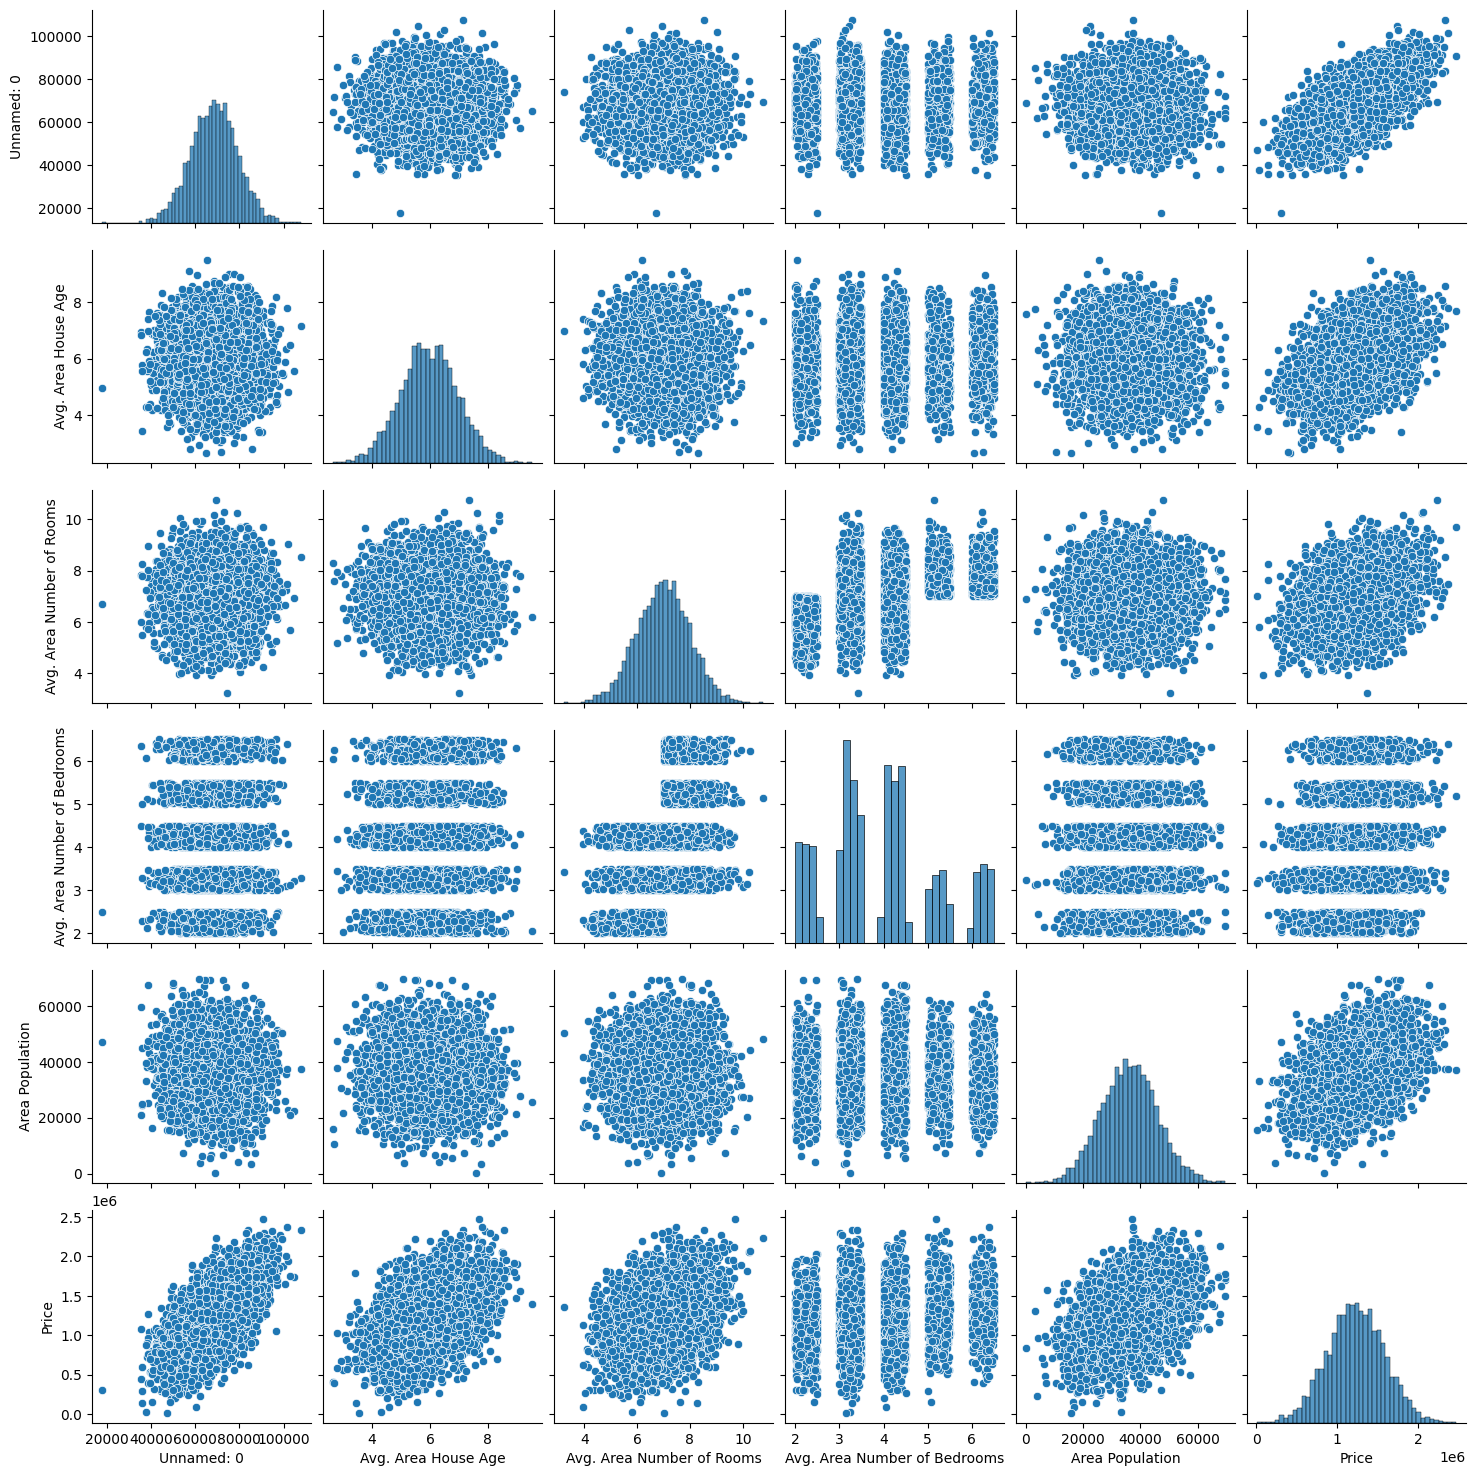

In [6]:
sns.pairplot(customers)
plt.savefig('output.jpg')

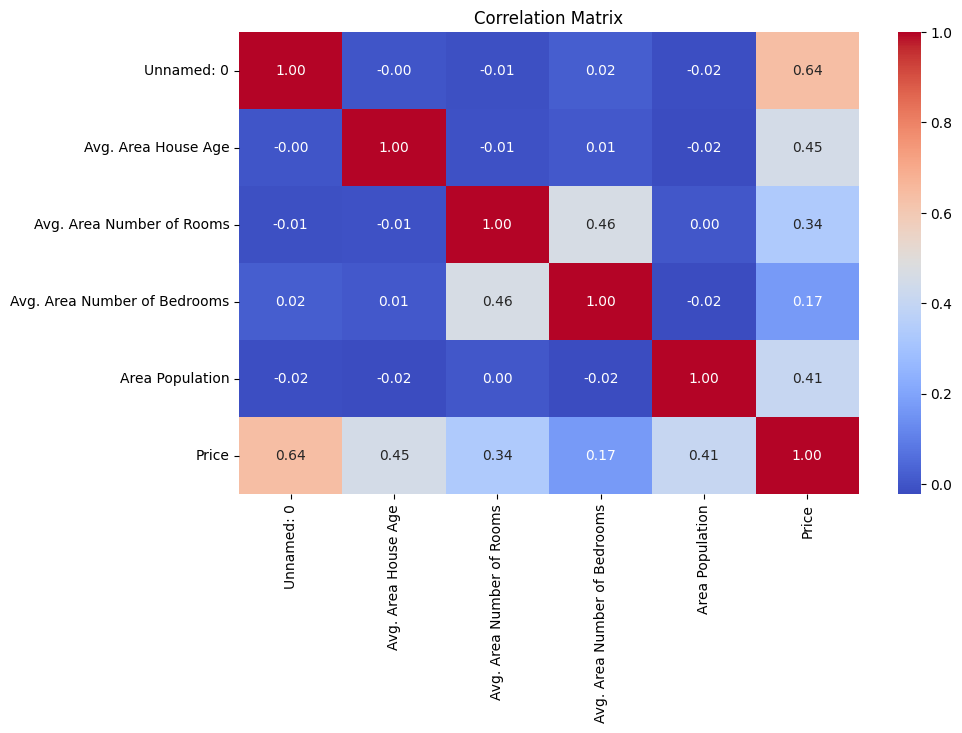

In [7]:
# Correlation matrix heatmap
# Exclude non-numeric columns
numeric_customers = customers.select_dtypes(include=[np.number])
correlation_matrix = numeric_customers.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.jpg')
plt.show()

In [8]:
scaler = StandardScaler()

X=customers.drop(['Price','Address'],axis=1)
y=customers['Price']

cols = X.columns

X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(y_test,pred)

0.9185060945363621

<Axes: xlabel='Price'>

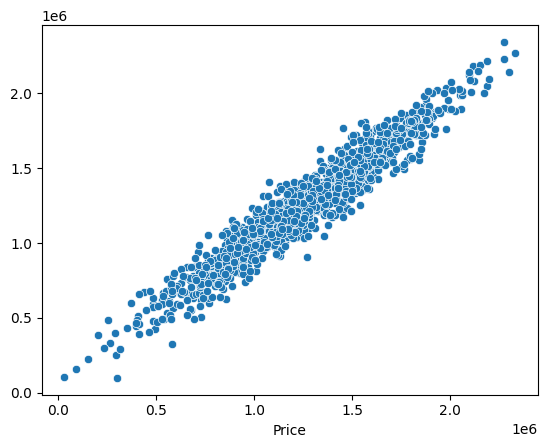

In [11]:
sns.scatterplot(x=y_test, y=pred)

<Axes: xlabel='Price', ylabel='Count'>

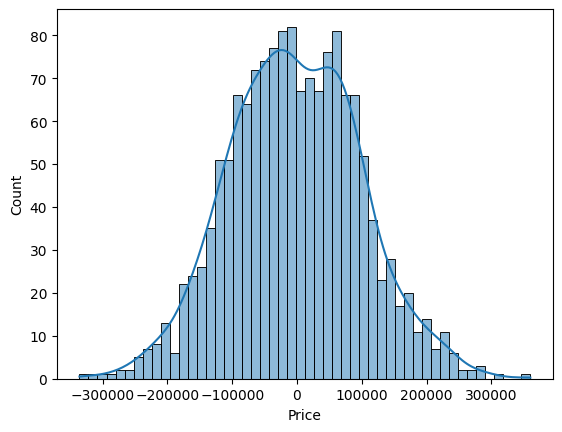

In [12]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [13]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Unnamed: 0,230377.522562
Avg. Area House Age,163793.118566
Area Population,151104.850817
Avg. Area Number of Rooms,122101.350269
Avg. Area Number of Bedrooms,1627.317237


In [14]:
print(f"R2 Score: {r2_score(y_test, pred)}")


R2 Score: 0.9185060945363621
